In [13]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [14]:
import numpy as np 
import pandas as pd
#import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
zoo_dir = "/kaggle/input/zoo-animal-classification/zoo.csv"
class_dir = "/kaggle/input/zoo-animal-classification/class.csv"

data_zoo = pd.read_csv('./datasets/zoo.csv')
data_class = pd.read_csv('./datasets/zooClass.csv')

In [16]:
display(data_zoo.head())
display(data_class)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [17]:
class_types = list(data_class['Class_Type'])
class_types

['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate']

In [18]:
class_map = {}
for i in range(data_class.shape[0]):        
    class_map[data_class['Class_Number'].iloc[i]] = data_class['Class_Type'].iloc[i]
    
class_map

{1: 'Mammal',
 2: 'Bird',
 3: 'Reptile',
 4: 'Fish',
 5: 'Amphibian',
 6: 'Bug',
 7: 'Invertebrate'}

In [19]:
print(f"Total animals in zoo data is {len(data_zoo['animal_name'].unique())}")
print(f"Total animal in class data is {data_class['Number_Of_Animal_Species_In_Class'].sum()}")

Total animals in zoo data is 100
Total animal in class data is 101


In [20]:
data = pd.merge(data_zoo, data_class, how='left', left_on='class_type', right_on='Class_Number')
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


In [21]:
# Bỏ các cột lặp lại và không hữu ích
data.drop(['Class_Number', 'Number_Of_Animal_Species_In_Class', 'Animal_Names'], axis=1, inplace=True)
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Class_Type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,Mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal


NameError: name 'sns' is not defined

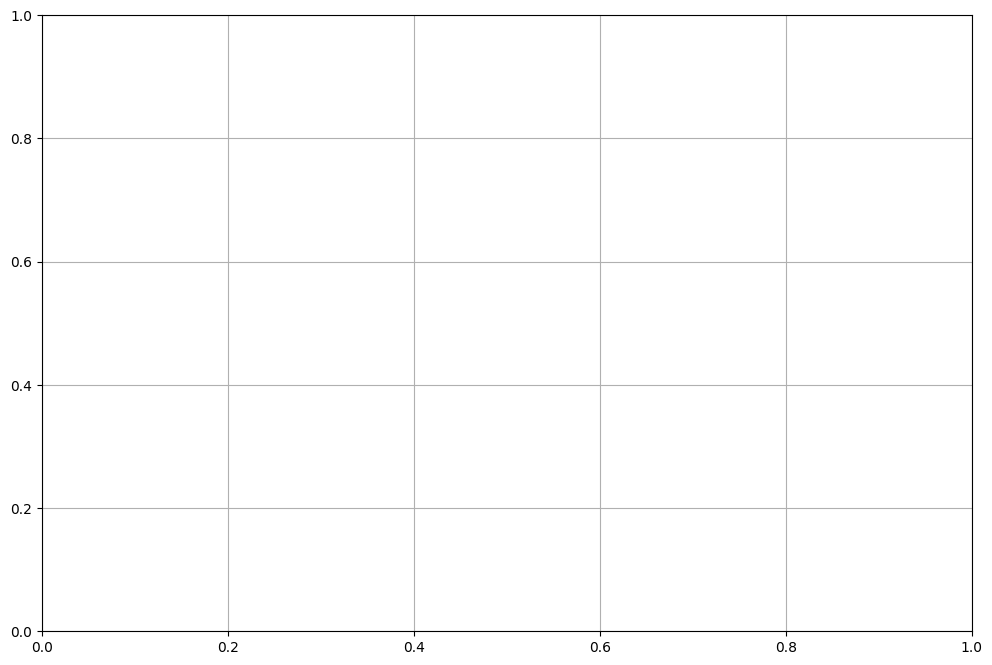

In [22]:
plt.figure(figsize = (12,8))
plt.grid(True)
ax = sns.countplot(x='Class_Type', data=data, palette='Spectral_r')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.5))

In [25]:
# Tách tất cả các loại động vật
animal_type = {}
animal_category = data.Class_Type.unique()
print("Seperating Categories...")
for category in animal_category:
    animal_type[category] = data[data['Class_Type']==category]
print("Seperation completed")

Seperating Categories...
Seperation completed


In [26]:
#Chia các loại ra thành DL training vs testing
SPLIT = 0.85
train = pd.DataFrame() # để kết hợp tất cả dữ liệu đào tạo đã tách từ tất cả các danh mục
test = pd.DataFrame() # để kết hợp tất cả dữ liệu thử nghiệm được phân tách từ tất cả các danh mục
for category_name in animal_type:
    m = int(animal_type[category_name].shape[0] * SPLIT)
    train = pd.concat([train, animal_type[category_name].iloc[: m, :]])
    test = pd.concat([test, animal_type[category_name].iloc[m:, :]])

#trộn DL train vs test lại 1 cách ngẫu nhiên
train = train.sample(frac=1)
test = test.sample(frac=1)

In [27]:
print(f"Training data shape = {train.shape}")
print(f"Training data shape = {test.shape}")

Training data shape = (83, 19)
Training data shape = (18, 19)


In [28]:
train.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Class_Type
30,gnat,0,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6,Bug
37,hawk,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2,Bird
49,mole,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1,Mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1,Mammal


In [30]:
# Chia training 85% & testing 15%
X_train = train.iloc[:,1:-2] # Ko sd animal_name & class_type & Class_Type(category of animal)
y_train = train.iloc[:, -2] # class_type là tính năng phụ thuộc
X_test = test.iloc[:, 1:-2]
y_test = test.iloc[:, -2]
print(X_train)

In [31]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [32]:
print(f"Accuracy = {metrics.accuracy_score(y_test, y_pred)}")
print(metrics.classification_report(y_test, y_pred))

Accuracy = 0.9444444444444444
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.94        18
   macro avg       0.79      0.86      0.81        18
weighted avg       0.92      0.94      0.93        18



C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: U

In [ ]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
_ = plot_tree(clf, feature_names=X_train.columns,  
                class_names=class_types, filled=True)
